## Compare UI Ekman and UI SST

In [304]:
## import packages
%matplotlib inline
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import glob
import os
import my_functions

ImportError: cannot import name 'DivergingNorm' from 'matplotlib.colors' (/Users/marie-louisekorte/miniconda3/envs/IbUpPy3.9.12/lib/python3.9/site-packages/matplotlib/colors.py)

In [31]:
## import data
os.chdir('/Users/marie-louisekorte/Documents/Uni Leipzig/Lisbon/Data.nosync/')
MTSS = xr.open_dataset('Surface_stress/Turbulent_mean/Turbulent_mean_weekly.nc')
UI_SST = UI_SST = xr.open_dataset('CoastNET_SST_UI.nc')
LSM = xr.open_dataset('ERA5_land_sea_mask.nc')

# add the land sea mask to the MTSS dataset
MTSS['lsm'] = LSM.lsm

In [32]:
# use my upwelling function (from my_functions.py)
UI_Ek = my_functions.upwelling_index(MTSS, MTSS.lat, MTSS.lon, MTSS.metss, MTSS.mntss)

## Plot

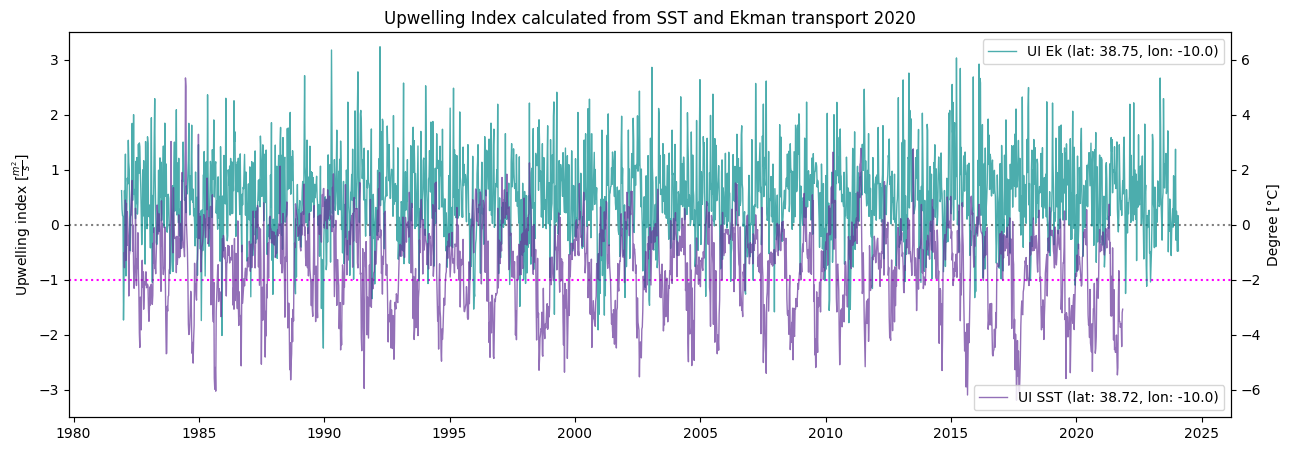

In [126]:
## compare UIs 
fig, ax1 = plt.subplots(figsize=(15,5))

# 0 line
plt.axhline(0, color = 'k', linestyle = ':', alpha = 0.5);
# -2°C line (as signifier for an upwelling event, -2/3 on primary axis = -2 on secondary)
plt.axhline(-1, color = 'magenta', linestyle = ':')

# primary axis
ax1.plot(UI_Ek.time, UI_Ek.upwelling_index.sel(lat = 38.7, lon = -10, method = 'nearest'), 
         label = f"UI Ek (lat: {UI_Ek.lat.sel(lat = 38.7, method = 'nearest').values.round(2)}, lon: {UI_Ek.lon.sel(lon = -10, method = 'nearest').values.round(2)})",
         color = 'darkcyan', alpha = 0.7, linewidth = 1)
# secondary axis 
ax2 = ax1.twinx()
ax2.plot(UI_SST.time, UI_SST.UI.sel(lat = 38.7, lon = -10, method = 'nearest'), 
         label = f"UI SST (lat: {UI_SST.lat.sel(lat = 38.7, method = 'nearest').values.round(2)}, lon: {UI_SST.lon.sel(lon = -10, method = 'nearest').values.round(2)})",
         color = 'rebeccapurple', alpha = 0.7, linewidth = 1)

# layout 
ax1.set_ylabel(r'Upwelling index [$\frac{m^{2}}{s}$]');
ax1.set_ylim(-3.5, 3.5)
ax1.legend(loc = 0)

ax2.set_ylabel('Degree [°C]')
ax2.set_ylim(-7,7)
ax2.legend(loc = 4)

plt.title('Upwelling Index calculated from SST and Ekman transport 2020')
plt.xlabel('Time [yr]');

Text(0.5, 0, 'Time [yr-m]')

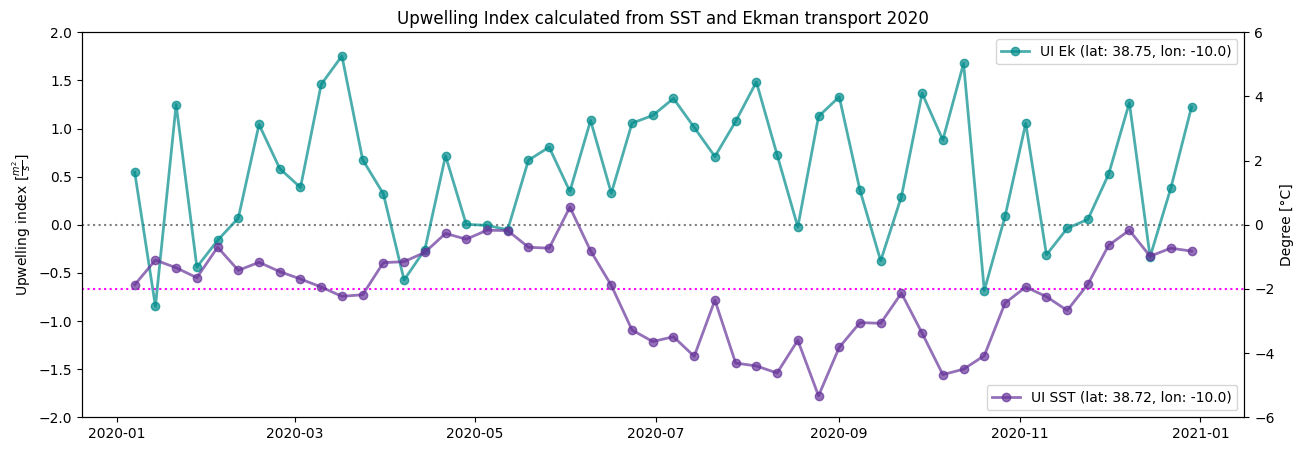

In [119]:
# compare only 1 year of data
fig, ax1 = plt.subplots(figsize=(15,5))

# 0 line
plt.axhline(0, color = 'k', linestyle = ':', alpha = 0.5);
# -2°C line (as signifier for an upwelling event, -2/3 on primary axis = -2 on secondary)
plt.axhline(-2/3, color = 'magenta', linestyle = ':')

# primary axis
ax1.plot(UI_Ek.time.sel(time = slice ("2020-01-01", "2020-12-31")), UI_Ek.upwelling_index.sel(time = slice ("2020-01-01", "2020-12-31")).sel(lat = 38.7, lon = -10, method = 'nearest'), 
         label = f"UI Ek (lat: {UI_Ek.lat.sel(lat = 38.7, method = 'nearest').values.round(2)}, lon: {UI_Ek.lon.sel(lon = -10, method = 'nearest').values.round(2)})",
         color = 'darkcyan', alpha = 0.7, linewidth = 2, marker = 'o')

# secondary axis 
ax2 = ax1.twinx()
ax2.plot(UI_SST.time.sel(time = slice ("2020-01-01", "2020-12-31")), UI_SST.UI.sel(time = slice ("2020-01-01", "2020-12-31")).sel(lat = 38.7, lon = -10, method = 'nearest'), 
         label = f"UI SST (lat: {UI_SST.lat.sel(lat = 38.7, method = 'nearest').values.round(2)}, lon: {UI_SST.lon.sel(lon = -10, method = 'nearest').values.round(2)})",
         color = 'rebeccapurple', alpha = 0.7, linewidth = 2, marker = 'o')

# layout 
ax1.set_ylabel(r'Upwelling index [$\frac{m^{2}}{s}$]');
ax1.set_ylim(-2, 2)
ax1.legend(loc = 0)

ax2.set_ylabel('Degree [°C]')
ax2.set_ylim(-6,6)
ax2.legend(loc = 4)

plt.title('Upwelling Index calculated from SST and Ekman transport 2020')
plt.xlabel('Time [yr-m]')


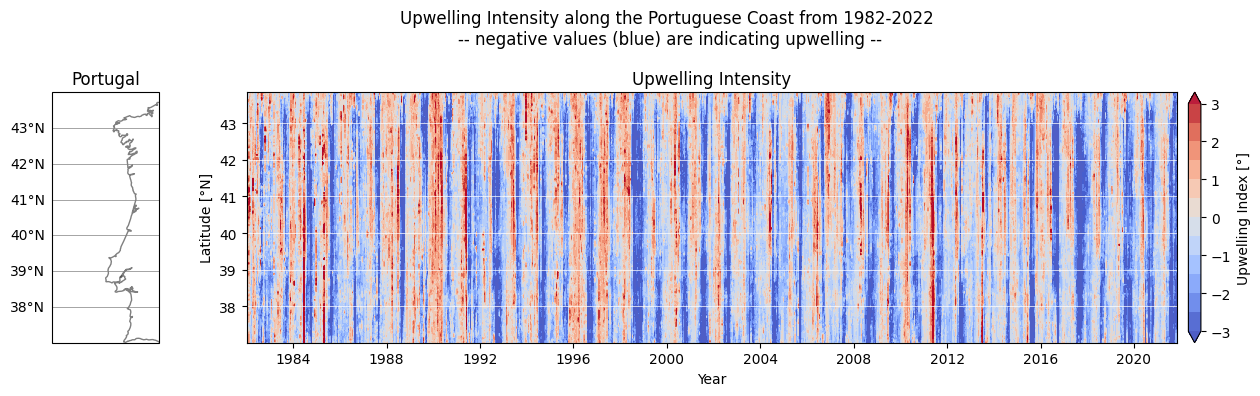

In [448]:
# plot UI SST as a function of time

# set up figure
fig = plt.figure(figsize = (14,4))
gs = fig.add_gridspec(1,2,width_ratios=[1,7])
ax1 = fig.add_subplot(gs[0], projection = ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[1])

# Portugal map
ax1.set_extent([-11, -8, 44, 37])
ax1.coastlines(color = 'black', alpha = 0.5)
gls = ax1.gridlines(draw_labels=False, linewidth = 0.5, color = 'grey')
gls.xlines = False
gls.left_labels = True

ax1.set_title('Portugal')

# plot UI SST
#cols = matplotlib.colors.LinearSegmentedColormap.from_list('',['darkcyan','deeppink']) # attempt at creating own colorbar
im2 = ax2.contourf(UI_SST.UI.time.values, UI_SST.lat.values, UI_SST.UI.sel(lon = - 10, method = 'nearest').transpose(), 
             cmap = 'coolwarm', levels = np.arange(-3, 3.5, 0.5), extend = 'both', alpha = 0.9)
ax2.set_ylabel('Latitude [°N]')
ax2.set_xlabel('Year');
ax2.set_title('Upwelling Intensity')
ax2.grid(color = 'white', linewidth = 0.5, axis = 'y')
plt.colorbar(im2, pad = 0.01, label = f'Upwelling Index [°]', ticks = np.arange(-3, 4, 1));

fig.suptitle('Upwelling Intensity along the Portuguese Coast from 1982-2022 \n-- negative values (blue) are indicating upwelling --')
fig.tight_layout()
fig.savefig('../Iberian_Coast_Upwelling/Figures/Overview_UI_SST.png', dpi = 300)

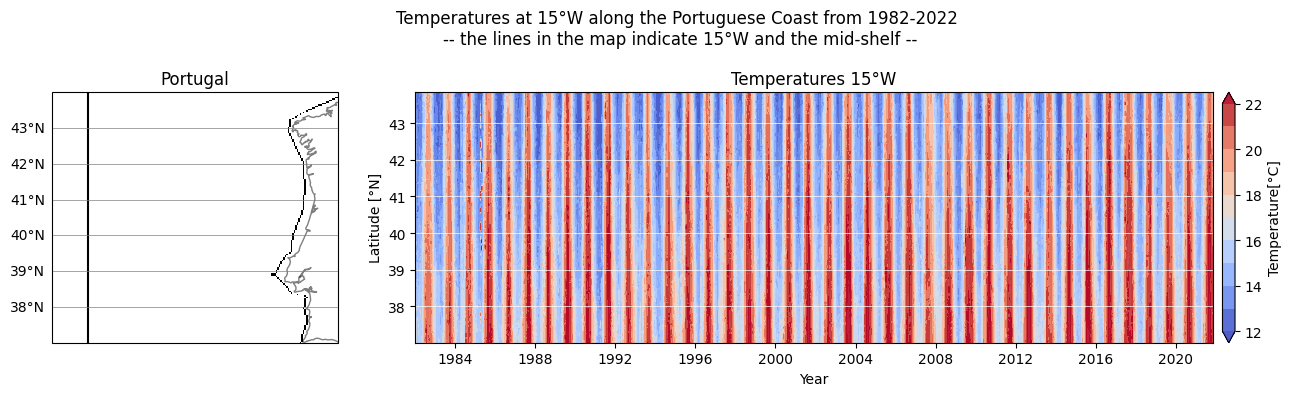

In [447]:
# plot SST Toff15 as a function of time

# set up figure
fig = plt.figure(figsize = (14,4))
gs = fig.add_gridspec(1,2,width_ratios=[1,3])
ax1 = fig.add_subplot(gs[0], projection = ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[1])

# Portugal map
ax1.set_extent([-16, -8, 44, 37])
ax1.coastlines(color = 'black', alpha = 0.5)
gls = ax1.gridlines(draw_labels=False, linewidth = 0.5, color = 'grey')
gls.xlines = False
gls.left_labels = True

# add mid-shelf and 15°W line
UI_SST.Tmid.isel(time = 0).transpose().plot(ax = ax1, cmap = 'Greys_r', levels = np.arange(285, 1000, 1), extend = 'both', 
                                            add_colorbar=False, transform = ccrs.PlateCarree())

lon1, lat1 = ccrs.PlateCarree().transform_point(-15 , 37, ccrs.Geodetic())
lon2, lat2 = ccrs.PlateCarree().transform_point(-15, 44, ccrs.Geodetic())
ax1.plot([lon1, lon2], [lat1, lat2], transform = ccrs.PlateCarree(), color='black', linewidth=1.5)

ax1.set_title('Portugal')

# plot temperatures
im2 = ax2.contourf(UI_SST.UI.time.values, UI_SST.lat.values, (UI_SST.Toff15W.sel(lon = - 15, method = 'nearest').transpose() - 273.15), 
             cmap = 'coolwarm', levels = np.arange(12, 23, 1), extend = 'both', alpha = 0.9)
ax2.set_ylabel('Latitude [°N]')
ax2.set_xlabel('Year');
ax2.set_title('Temperatures 15°W')
ax2.grid(color = 'white', linewidth = 0.5, axis = 'y')
plt.colorbar(im2, pad = 0.01, label = 'Temperature[°C]');

fig.suptitle('Temperatures at 15°W along the Portuguese Coast from 1982-2022 \n-- the lines in the map indicate 15°W and the mid-shelf --')
fig.tight_layout()
fig.savefig('../Iberian_Coast_Upwelling/Figures/Overview_T_15W.png', dpi = 300)

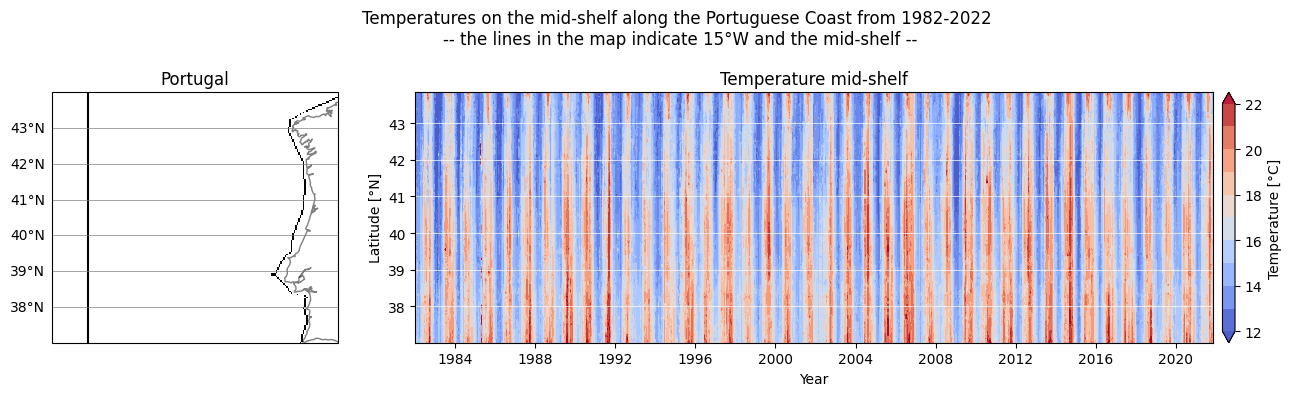

In [445]:
# plot SST Tmid as a function of time

# set up figure
fig = plt.figure(figsize = (14,4))
gs = fig.add_gridspec(1,2,width_ratios=[1,3])
ax1 = fig.add_subplot(gs[0], projection = ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[1])

# Portugal map
ax1.set_extent([-16, -8, 44, 37])
ax1.coastlines(color = 'black', alpha = 0.5)
gls = ax1.gridlines(draw_labels=False, linewidth = 0.5, color = 'grey')
gls.xlines = False
gls.left_labels = True

# add mid-shelf and 15°W line
UI_SST.Tmid.isel(time = 0).transpose().plot(ax = ax1, cmap = 'Greys_r', levels = np.arange(285, 1000, 1), extend = 'both', 
                                            add_colorbar=False, transform = ccrs.PlateCarree())
lon1, lat1 = ccrs.PlateCarree().transform_point(-15 , 37, ccrs.Geodetic())
lon2, lat2 = ccrs.PlateCarree().transform_point(-15, 44, ccrs.Geodetic())
ax1.plot([lon1, lon2], [lat1, lat2], transform = ccrs.PlateCarree(), color='black', linewidth=1.5)

ax1.set_title('Portugal')


# plot temperatures
im2 = ax2.contourf(UI_SST.UI.time.values, UI_SST.lat.values, UI_SST.Tmid.sum(dim = 'lon').transpose() - 273.15, 
             cmap = 'coolwarm', levels = np.arange(12, 23, 1), extend = 'both', alpha = 0.9)
ax2.set_ylabel('Latitude [°N]')
ax2.set_xlabel('Year');
ax2.set_title('Temperature mid-shelf')
ax2.grid(color = 'white', linewidth = 0.5, axis = 'y')
plt.colorbar(im2, pad = 0.01, label = 'Temperature [°C]');

fig.suptitle('Temperatures on the mid-shelf along the Portuguese Coast from 1982-2022 \n-- the lines in the map indicate 15°W and the mid-shelf --')
fig.tight_layout()
fig.savefig('../Iberian_Coast_Upwelling/Figures/Overview_T_mid.png', dpi = 300)

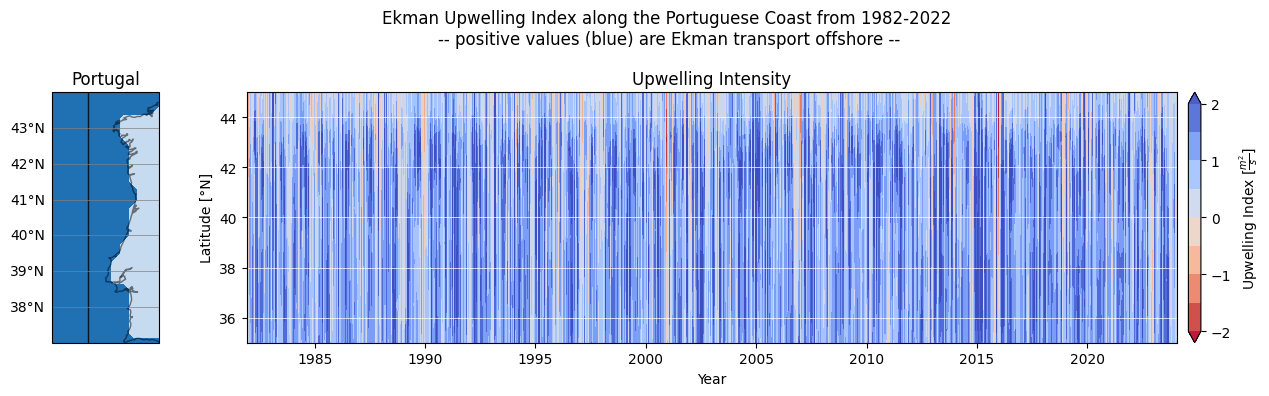

In [446]:
# plot UI Ek as a function of time

# set up figure
fig = plt.figure(figsize = (14,4))
gs = fig.add_gridspec(1,2,width_ratios=[1,7])
ax1 = fig.add_subplot(gs[0], projection = ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[1])

# Portugal map
ax1.set_extent([-11, -8, 44, 37])
ax1.coastlines(color = 'black', alpha = 0.5)
gls = ax1.gridlines(draw_labels=False, linewidth = 0.5, color = 'grey')
gls.xlines = False
gls.left_labels = True

# plot ERA5 land mask
ax1.contourf(UI_Ek.lon, UI_Ek.lat, UI_Ek.lsm, cmap = 'Blues', transform = ccrs.PlateCarree())

# plot 10°W line (line I am plotting my UI Ek for)
lon1, lat1 = ccrs.PlateCarree().transform_point(-10 , 37, ccrs.Geodetic())
lon2, lat2 = ccrs.PlateCarree().transform_point(-10, 44, ccrs.Geodetic())
ax1.plot([lon1, lon2], [lat1, lat2], transform = ccrs.PlateCarree(), color='black', linewidth=1, alpha = 0.8)

ax1.set_title('Portugal')

# plot UI Ek
im2 = ax2.contourf(UI_Ek.time.values, UI_Ek.lat.values, UI_Ek.upwelling_index.sel(lon = - 10, method = 'nearest').transpose(), 
             cmap = 'coolwarm_r', levels = np.arange(-2, 2.5, 0.5), extend = 'both', alpha = 0.9)
ax2.set_ylabel('Latitude [°N]')
ax2.set_xlabel('Year');
ax2.set_title('Upwelling Intensity')
ax2.grid(color = 'white', linewidth = 0.5, axis = 'y')
plt.colorbar(im2, pad = 0.01, label = r'Upwelling Index [$\frac{m^2}{s}$]', ticks = np.arange(-2, 3, 1));

fig.suptitle('Ekman Upwelling Index along the Portuguese Coast from 1982-2022 \n-- positive values (blue) are Ekman transport offshore --')
fig.tight_layout()
fig.savefig('../Iberian_Coast_Upwelling/Figures/Overview_UI_Ekman.png', dpi = 300)